
# BioE 131 Lab 6

In [1]:
#Author: Shirley Zhou

In [23]:
import pandas as pd
import numpy as np
import subprocess
%matplotlib inline
import matplotlib.pyplot as plt

## Alignment

### Align with Human Genome

Apply the original reads through `bowtie2` to align with human genome and see how much of the reads are contaminated.

In [4]:
!bowtie2 -p 4 --very-fast --no-unal -x ../../../../../data/references/hg19/hg19 -1 ../../../../data/Lab6_data/mixed_reads1.fastq -2 ../../../../data/Lab6_data/mixed_reads2.fastq -S output.sam --un-conc unaligned.fastq

1285441 reads; of these:
  1285441 (100.00%) were paired; of these:
    1285105 (99.97%) aligned concordantly 0 times
    114 (0.01%) aligned concordantly exactly 1 time
    222 (0.02%) aligned concordantly >1 times
    ----
    1285105 pairs aligned concordantly 0 times; of these:
      227762 (17.72%) aligned discordantly 1 time
    ----
    1057343 pairs aligned 0 times concordantly or discordantly; of these:
      2114686 mates make up the pairs; of these:
        2062758 (97.54%) aligned 0 times
        15162 (0.72%) aligned exactly 1 time
        36766 (1.74%) aligned >1 times
19.76% overall alignment rate


From the `bowtie2` output, we can tell that there is about 20% of the reads that aligned to the human genome (and hence could be the source of contamination.

### Align with Bacterial Genome (S. oneidensis MR-1)

Apply the __unaligned__ output from the previous alignment through `bowtie2` again to align with __S. oneidensis MR-1__ genome and see how much of the reads actually align to our genome of interest.

In [9]:
!bowtie2 -p 4 --very-fast --no-unal -x ../../../../../data/references/shewanella_oneidensis_mr-1/shewanella_oneidensis_mr-1 -1 unaligned.1.fastq -2 unaligned.2.fastq -S output_s1.sam

1285105 reads; of these:
  1285105 (100.00%) were paired; of these:
    1049640 (81.68%) aligned concordantly 0 times
    220987 (17.20%) aligned concordantly exactly 1 time
    14478 (1.13%) aligned concordantly >1 times
    ----
    1049640 pairs aligned concordantly 0 times; of these:
      288853 (27.52%) aligned discordantly 1 time
    ----
    760787 pairs aligned 0 times concordantly or discordantly; of these:
      1521574 mates make up the pairs; of these:
        1245335 (81.85%) aligned 0 times
        221076 (14.53%) aligned exactly 1 time
        55163 (3.63%) aligned >1 times
51.55% overall alignment rate


## Convertion

### `Samtool`

Convert .sam to .bam

In [10]:
!samtools view -b output_s1.sam > output_s1.bam

Sort the .bam

In [11]:
!samtools sort output_s1.bam > output_s1_sorted.bam

Index the .bam

In [12]:
!samtools index output_s1_sorted.bam

Output a .tab file with the depth of coverage for every position in the reference genome

In [13]:
!samtools depth -a output_s1_sorted.bam > s1_depth.tab

## Visualization 

In [35]:
table_s1 = pd.read_csv('s1_depth.tab', sep='\t', header = None).drop([0], axis = 1)
table_s1.columns = ['Genome Position (bp)', 'Depth of Coverage']

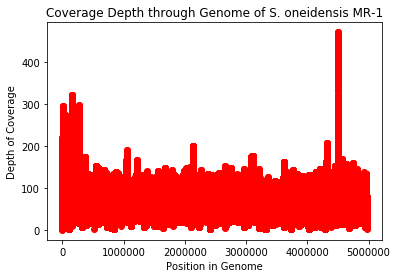

In [38]:
plt.plot(table_s1['Genome Position (bp)'], table_s1['Depth of Coverage'], 'ro')
plt.xlabel('Position in Genome')
plt.ylabel('Depth of Coverage')
plt.title('Coverage Depth through Genome of S. oneidensis MR-1')
plt.show()

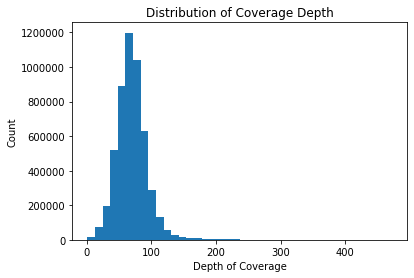

In [39]:
plt.hist(table_s1['Depth of Coverage'], bins = 40)
plt.ylabel('Count')
plt.xlabel('Depth of Coverage')
plt.title('Distribution of Coverage Depth')
plt.show()